In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, square, sawtooth
from scipy.fft import fft, fftfreq
from scipy.ndimage import gaussian_filter1d  # Gaussian smoother

In [2]:
import os
import sys

# Add the src directory to the Python path
src_path = os.path.abspath(os.path.join(os.getcwd(), "../src"))
sys.path.append(src_path)

# Verify the path is added
print(sys.path)

['/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/Users/kaspervanderhorst/Desktop/thesis/venv/lib/python3.12/site-packages', '/Users/kaspervanderhorst/Desktop/thesis/src']


In [3]:
# Cell 2: Define the function for frequency band detection and visualization
def analyze_signal(signal, components, fs, target_bands=2, sigma=0.5, num_thresholds=100):
    """
    Analyze and visualize the frequency bands of a signal.

    Args:
        signal (numpy.ndarray): The input signal.
        components (numpy.ndarray): The ground truth components of the signal.
        fs (int): Sampling frequency in Hz.
        target_bands (int): Number of frequency bands to detect.
        sigma (float): Standard deviation for Gaussian smoothing.
        num_thresholds (int): Number of thresholds to try for band detection.
    """
    # --- Step 1: Visualize the full signal and its components ---
    plt.figure(figsize=(14, 6))
    plt.plot(signal, label="Full Signal", linewidth=2)
    for i, component in enumerate(components):
        plt.plot(component, label=f"Component {i + 1}", linestyle="dashed", linewidth=1.5)
    plt.title("Full Signal and Components")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    n = len(signal)  # Define n as the length of the signal
    freqs = fftfreq(n, 1/fs)[:n//2]
    fft_magnitude = np.abs(fft(signal))[:n//2]

    # Gaussian smoothing
    smoothed_magnitude = gaussian_filter1d(fft_magnitude, sigma=sigma)

    # Band detection
    def find_frequency_bands(magnitude, freqs, target_bands, num_thresholds):
        thresholds = np.linspace(np.min(magnitude), np.max(magnitude), num_thresholds)[::-1]
        for thresh in thresholds:
            mask = magnitude > thresh
            regions = []
            in_band = False
            start = None
            for i, active in enumerate(mask):
                if active and not in_band:
                    start = i
                    in_band = True
                elif not active and in_band:
                    regions.append((freqs[start], freqs[i - 1]))
                    in_band = False
            if in_band:
                regions.append((freqs[start], freqs[-1]))
            if len(regions) == target_bands:
                return thresh, regions
        return None, []

    threshold, bands = find_frequency_bands(smoothed_magnitude, freqs, target_bands, num_thresholds)

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(freqs, fft_magnitude, alpha=0.3, label="Raw FFT Magnitude", linewidth=1)
    plt.plot(freqs, smoothed_magnitude, label="Gaussian Smoothed", linewidth=2)
    if threshold is not None:
        plt.axhline(threshold, color='gray', linestyle='--', label=f"Threshold = {threshold:.2f}")
        for i, (fmin, fmax) in enumerate(bands):
            plt.axvspan(fmin, fmax, alpha=0.2, label=f"Band {i+1}: {int(fmin)}–{int(fmax)} Hz")

    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title("Frequency Band Detection with Gaussian Smoothing")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()




Loaded dataset with 10000 samples.
Analyzing signal 1


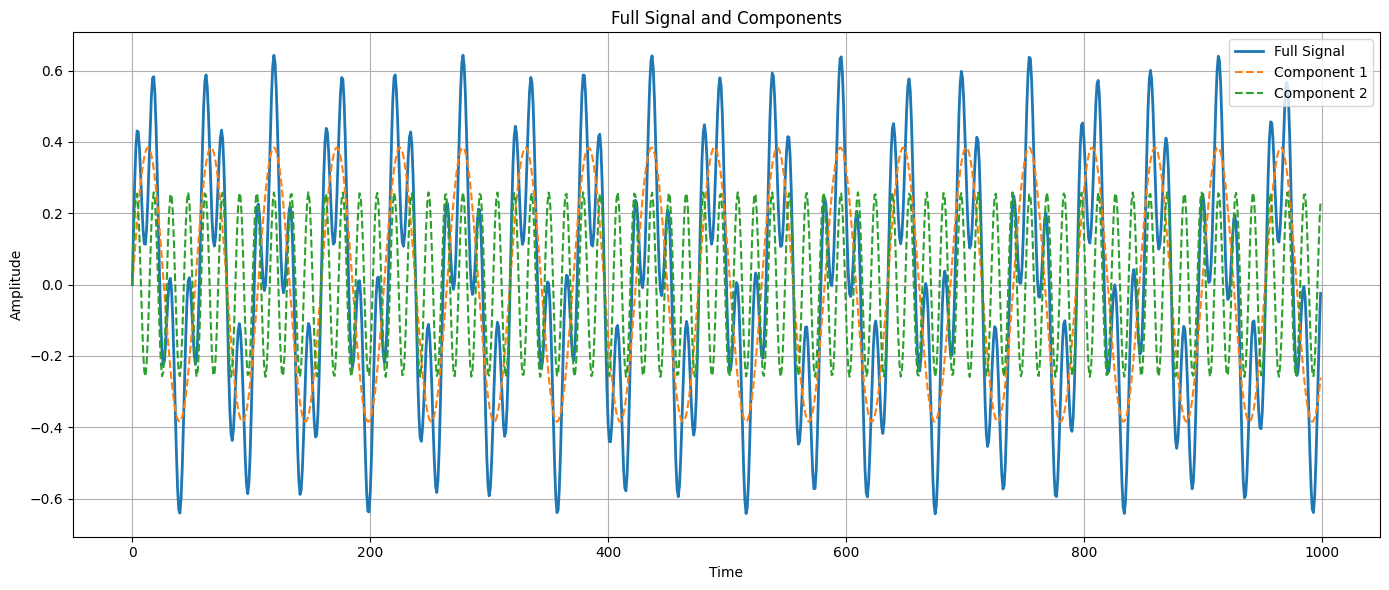

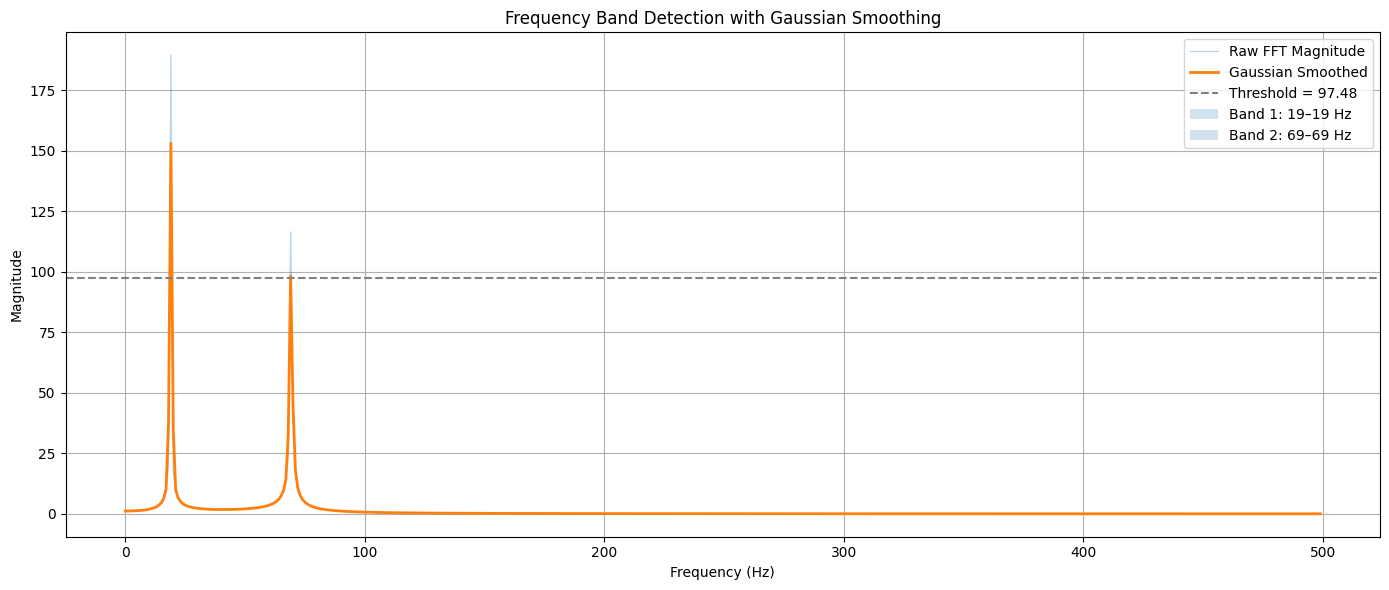

Analyzing signal 2


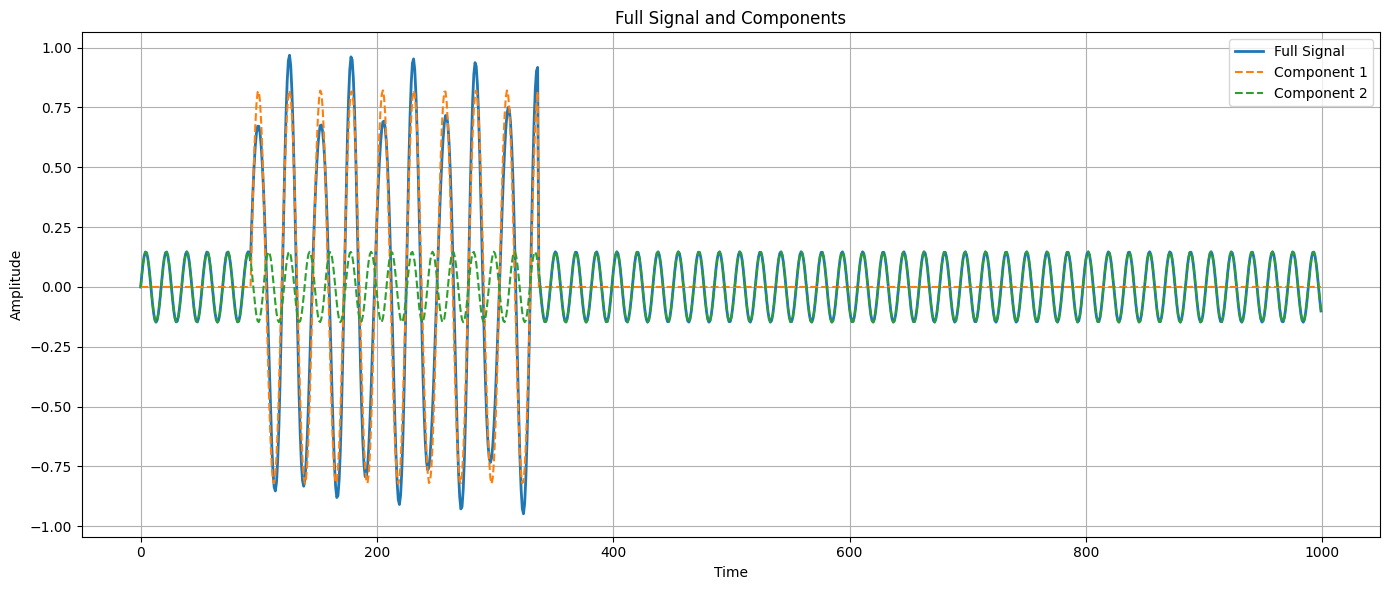

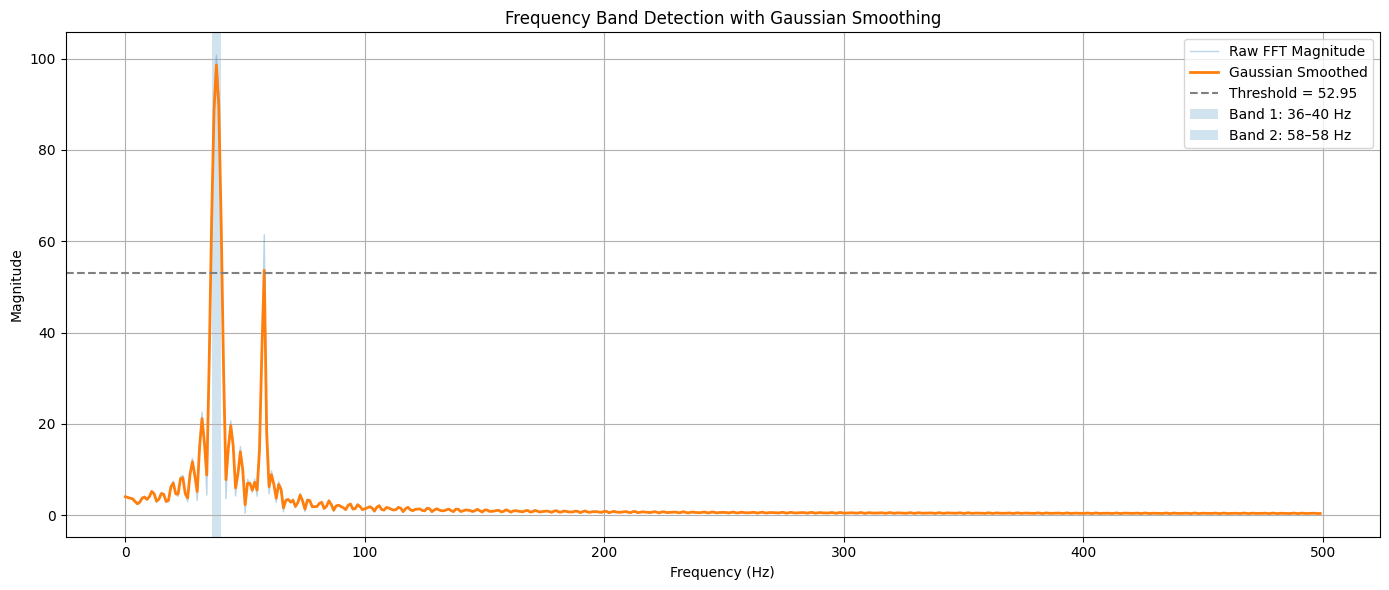

Analyzing signal 3


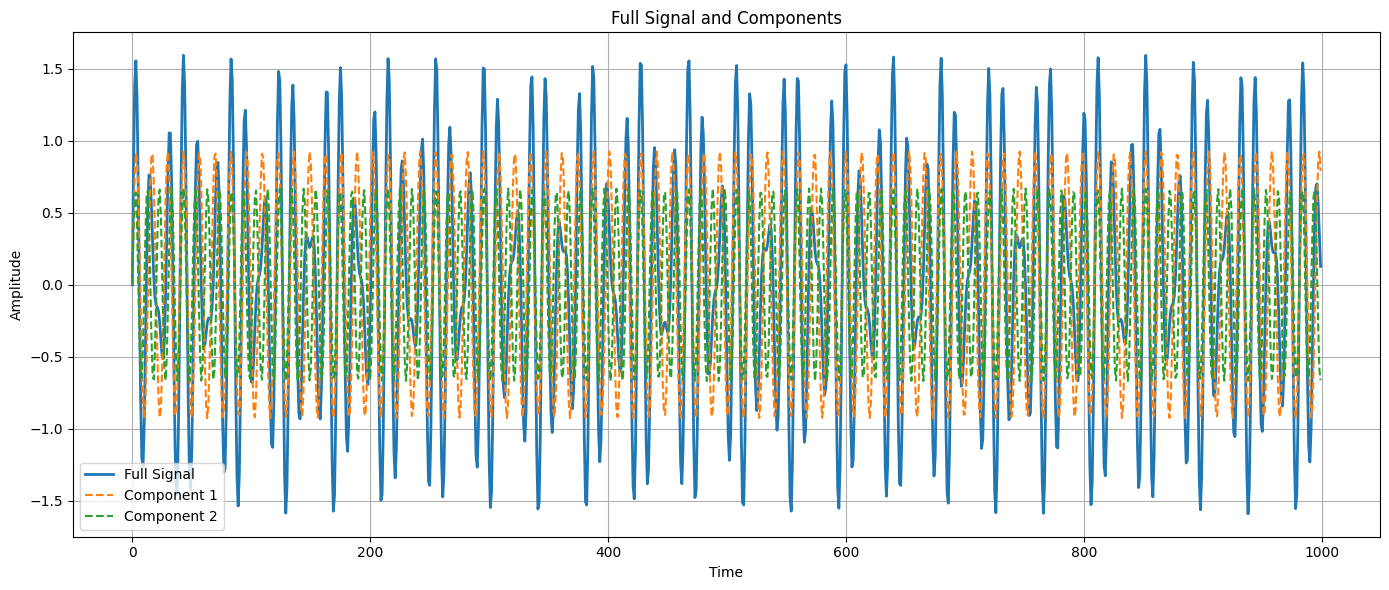

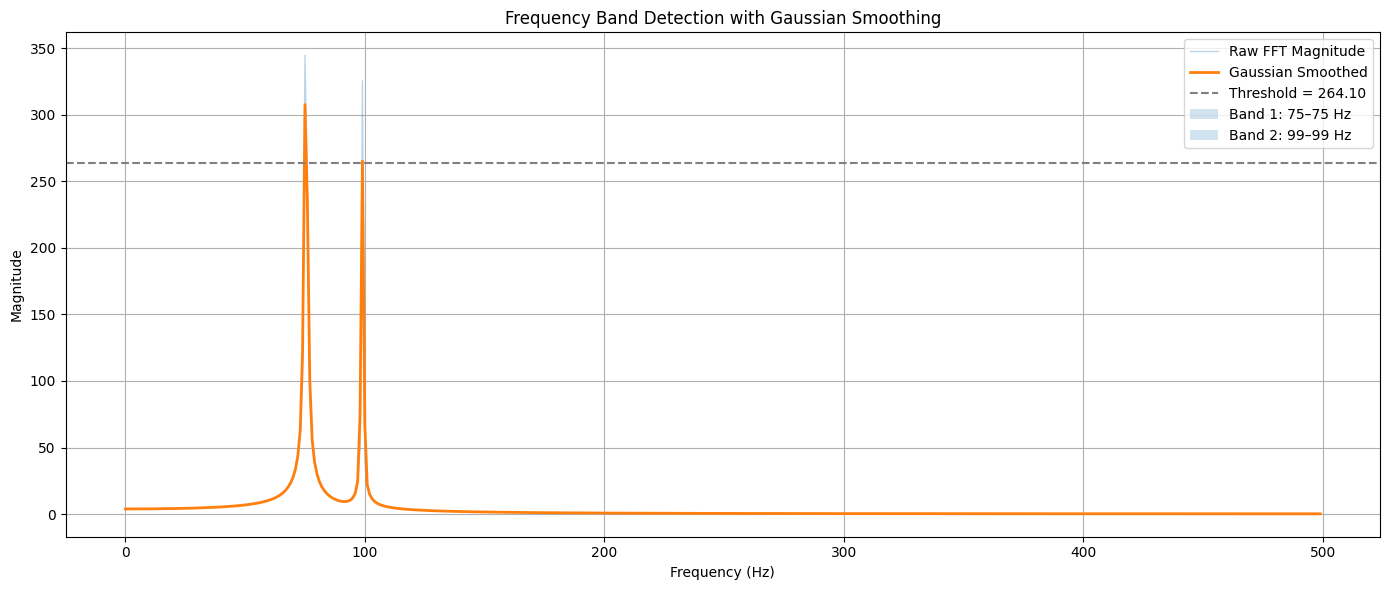

Analyzing signal 4


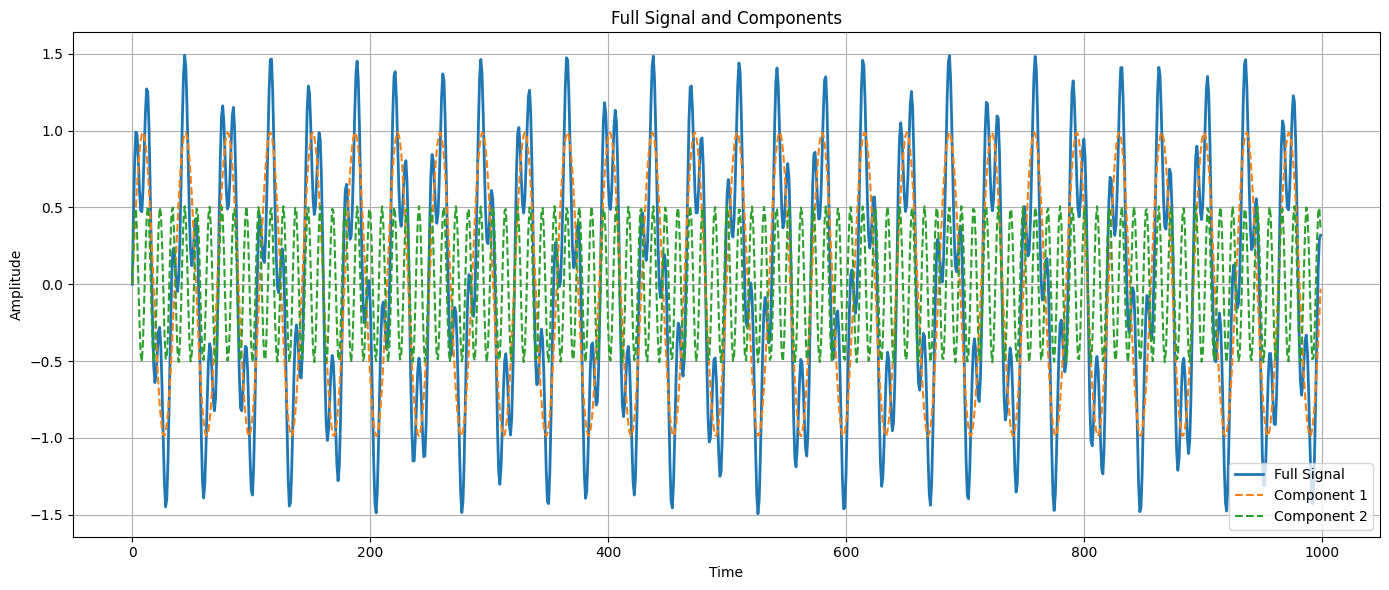

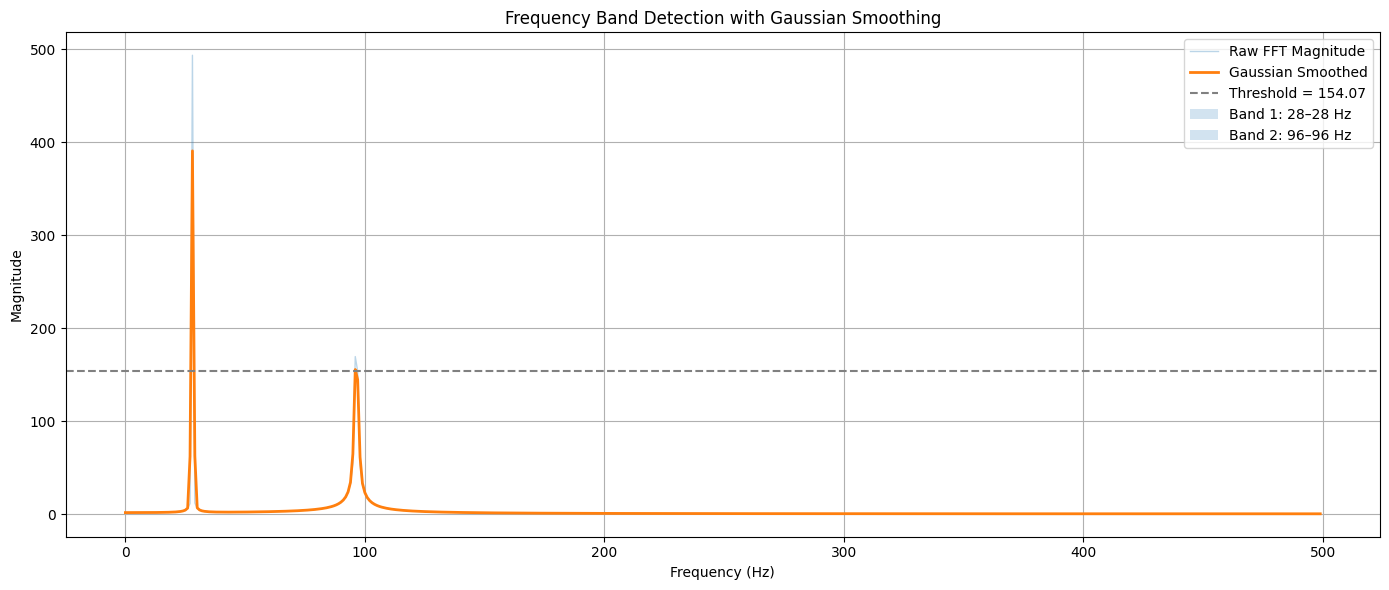

Analyzing signal 5


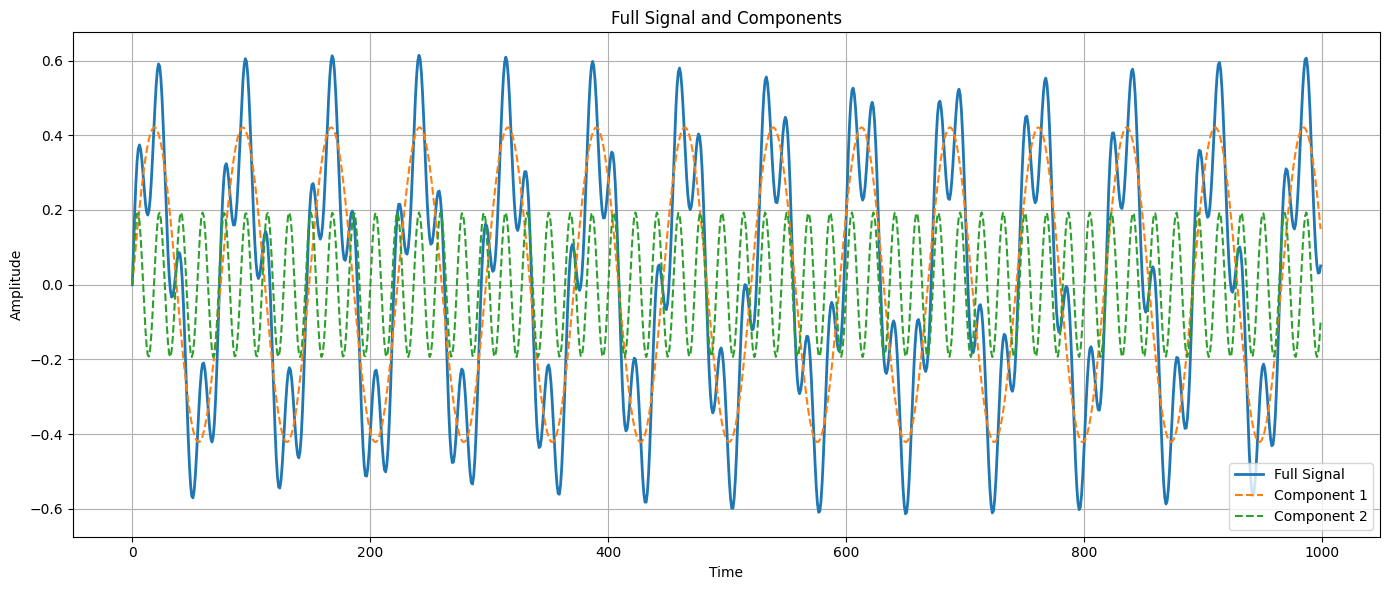

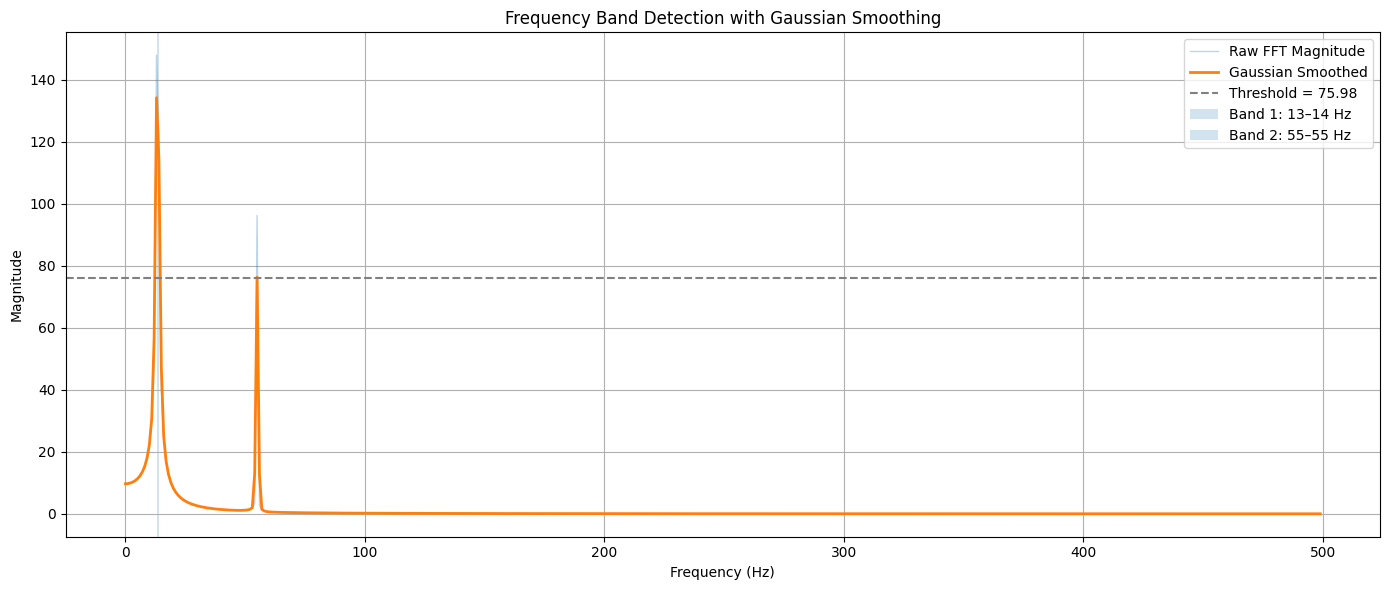

In [8]:
data_path = "../src/data/data_storage/composite_signals_20250425T153555.npz"  # Update with your dataset path
data = np.load(data_path)

# Extract signals and components
X = data['composite_signals']  # Composite signals
y = data['components']  # Ground truth components
fs = 1000  # Sampling frequency (update if different)

print(f"Loaded dataset with {X.shape[0]} samples.")

# Cell 4: Test the function on some signals from the dataset
# Select a few signals to test
sample_indices = [1, 2, 3, 4, 5]  # Adjust indices as needed
for idx in sample_indices:
    print(f"Analyzing signal {idx}")
    analyze_signal(X[idx], y[idx], fs)
